In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tfc

In [57]:
tfc.disable_eager_execution()

In [58]:
x = np.linspace(15, 100, 100)
y = np.linspace(15, 100, 100)

In [59]:
x += np.random.uniform(-15, 15, 100)
y += np.random.uniform(-15, 15, 100)

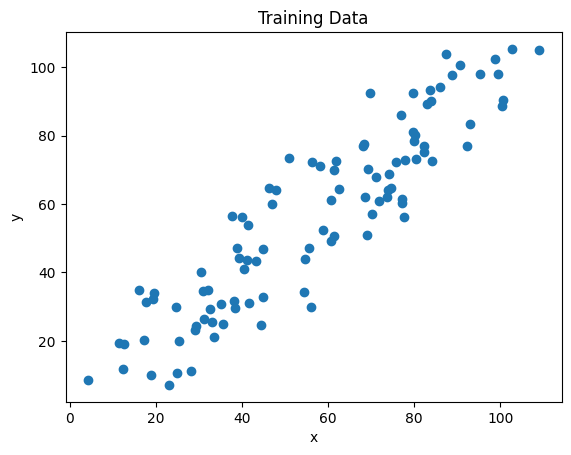

In [60]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Training Data")
plt.show()

In [61]:
X = tfc.placeholder("float")
Y = tfc.placeholder("float")
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [62]:
learning_rate = 0.01
training_epochs = 1000

In [63]:
y_pred = tf.add(tf.multiply(X, W), b)
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * len(x))

In [64]:
optimizer_gradient = tfc.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [65]:
init = tfc.global_variables_initializer()

In [66]:
with tfc.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (_x, _y) in zip(x, y):
            sess.run(optimizer_gradient, feed_dict = {X : _x, Y : _y})
        if (epoch + 1) % 50 == 0:
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 66.80443 W = 1.0368731 b = 0.24802382
Epoch 100 : cost = 67.18715 W = 1.0318317 b = 0.74406946
Epoch 150 : cost = 67.610466 W = 1.027003 b = 1.2191927
Epoch 200 : cost = 68.067924 W = 1.0223778 b = 1.674273
Epoch 250 : cost = 68.5539 W = 1.0179479 b = 2.1101573
Epoch 300 : cost = 69.063156 W = 1.0137048 b = 2.5276601
Epoch 350 : cost = 69.59113 W = 1.0096407 b = 2.9275465
Epoch 400 : cost = 70.1337 W = 1.0057479 b = 3.310568
Epoch 450 : cost = 70.68722 W = 1.0020194 b = 3.6774335
Epoch 500 : cost = 71.24837 W = 0.99844813 b = 4.0288167
Epoch 550 : cost = 71.814415 W = 0.99502754 b = 4.3653917
Epoch 600 : cost = 72.382614 W = 0.9917513 b = 4.6877513
Epoch 650 : cost = 72.95082 W = 0.9886131 b = 4.996524
Epoch 700 : cost = 73.51707 W = 0.9856075 b = 5.292263
Epoch 750 : cost = 74.07956 W = 0.98272866 b = 5.575525
Epoch 800 : cost = 74.63694 W = 0.9799711 b = 5.8468604
Epoch 850 : cost = 75.18766 W = 0.9773298 b = 6.1067395
Epoch 900 : cost = 75.73075 W = 0.97480005 b = 

In [67]:
predictions = weight * x + bias
predictions

array([ 17.88291565,  11.01456895,  37.09803883,  31.04983395,
        35.33868155,  34.10208387,  29.25055439,  25.06909886,
        24.07746429,  18.83984717,  19.08355586,  25.76076864,
        22.38427598,  25.70915001,  43.82331217,  36.94073151,
        31.40011587,  36.41898493,  48.76716702,  23.52150723,
        35.05369587,  49.90533915,  41.35002263,  39.28139778,
        44.12287084,  30.79092223,  38.84296265,  47.32297636,
        40.8834254 ,  38.52584488,  38.03083711,  60.77984876,
        44.8986734 ,  61.29454234,  50.33394285,  43.37081714,
        59.61089059,  44.60908634,  50.2949418 ,  46.95152097,
        66.45674183,  67.41957681,  63.95370672,  46.15657068,
        46.85783772,  59.90845368,  45.72768534,  51.81160061,
        74.82598301,  73.80925858,  63.26111408,  78.23401509,
        65.67786551,  61.41440494,  52.42681041,  53.36201979,
        81.60712031,  65.68395877,  82.15453097,  56.31756004,
        76.5628848 ,  78.7186164 ,  66.90626538,  72.88

In [68]:
print(f"Training cost = {training_cost}\nWeight = {weight}\nbias = {bias}")

Training cost = 76.79029846191406
Weight = 0.9700561761856079
bias = 6.822427749633789


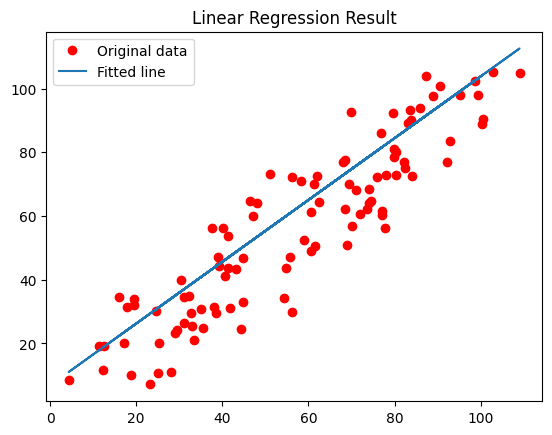

In [69]:
plt.plot(x, y, "ro", label ="Original data")
plt.plot(x, predictions, label ="Fitted line")
plt.title("Linear Regression Result")
plt.legend()
plt.show()